
# Project: NO_SHOW APPOINTMENTS DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 110527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in the dataset.

The dataset has 13 columns to mention a few;
>PatientID which indicates the ID of the patient,AppointmentID which indicates the appointment ID of the patient,Gender,
ScheduledDay which tells us on what day the patient set up their appointment,Neighborhood which indicates the location of the hospital and Scholarship which indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
The last column named No-show means ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
2. Number of patients that did not show up for the appointment
3. Number of patients that showed up for the appointment 
4. Does age predict if the patient will show up or not?
5. Does scholarship predict whether the patient will show up?
6. Does Hipertension predict whether the patient will show up
7. Does Diabetes predict whether the patient will show up?
8. Does Alcoholism predict whether the patient will show up? 
9. Does being Handcapped predict whether the patient will show up?
10. Does SMS_received predict whether the patient will show up? 
11. Does Gender predict if a patient will show up for the scheduled appointment? 
12. Does Neighbourhood predict if a patient will show up for the scheduled appointment?
13. Does gender determines if one has Hipertension?
14. Does gender determine if one has diabetes?

In [4]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

The cell above imports and loads the noshow appointments dataset and all the necessary packages needed for analysis.

<a id='wrangling'></a>
## Data Wrangling

In this section we will load a few rows of the dataset and look around the dataset by checking summary of the dataframe, checking the data types of columns, number of columns and rows, number of uniques values and the descriptive statistics of the dataset.

In [29]:
# Load data and print out a few lines
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The df.head() returns the first five rows of the dataset.

In [6]:
# Finding descriptive statistics of the data set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The descriptive statistics shows a summary that quantitatively describes the features of the collected data.

In [7]:
#number of columns and rows
df.shape

(110527, 14)

The shape attribute returns the number of rows and columns.
The dataframe has 110527 rows and 14 columns.

In [8]:
#number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

This returns the number of unique values in each column like there are 2 unique values in the gender column(F and M).

In [9]:
#columns data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

This shows each column's data type, the age column has integers.

In [10]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This shows summary of missing values in each column. The dataset has no missing values.


### Data Cleaning
For data cleaning we check for missing values in each column and fill them and then check for duplicate values in the dataframe and drop them if necessary.
 

In [11]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Checked for missing values and there are none all the columns have 110527 rows.

In [12]:
#drop unnecessary columns(PatientId,AppointmentID)
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

Drop unnecessary columns which are not really needed(patientID and AppointmentID)

In [13]:
#check for duplicates in the data
sum(df.duplicated())

635

The code above checked for duplicate data and there are 635 duplicates in the data. We do not have to drop the duplicates because we developed the duplicates after dropping two rows.

In [14]:
df=df.rename(columns={'No-show':'No_show'})
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We rename the 'No-show' column title to 'No_show' because the No-show returns an error in some codes.

After checking and making few changes in the dataset it looks perfect for analysis exploration.

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that the data is trimmed and cleaned,we **Compute statistics** and **create visualizations** with the goal of addressing the research questions that were posed in the Introduction section. 

## Exploring data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52c1f52b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f52c1e40828>]], dtype=object)

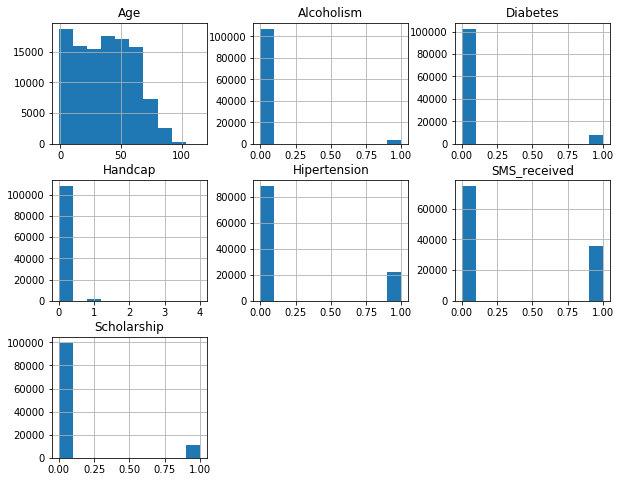

In [15]:
df.hist(figsize=(10,8))

Histograms are used find if a variable is normally distributed. The age variable is right skewed, many people in the dataset are young and in the Alcoholism variable many people are not alcoholic.

Text(0.5,1,'PATIENTS AGE')

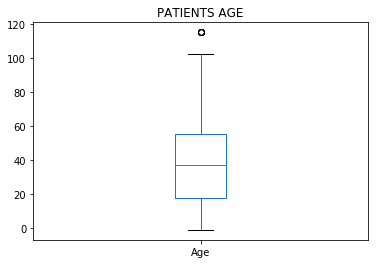

In [16]:
df['Age'].plot(kind='box');
plt.title('PATIENTS AGE')

Boxplots are used to check data's symmetry, skews and outliers. The age box plot above shows that the patient's age has outliers.

In [17]:
#create the percent function
def percent(value):
    percent=round(df[value].value_counts()/len(df)*100)
    return percent

Text(0.5,1,'NO_SHOW DISTRIBUTION')

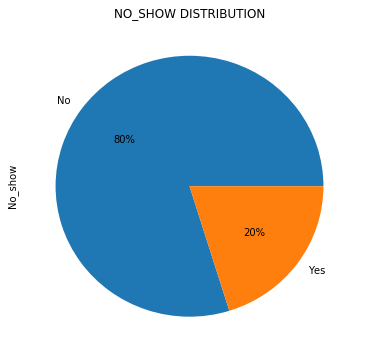

In [23]:
#returns a pie chart with percentages 
value=percent('No_show')
df['No_show'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6,6)) #%1.0f%% returns a percentage in a whole number without decimal points.
plt.title('NO_SHOW DISTRIBUTION')

Patients that showed up are more than the ones that did not show up. 80% of the patients showed up while 20% did not show up for the appointment.

Text(0.5,1,'SCHOLARSHIP DISTRIBUTION')

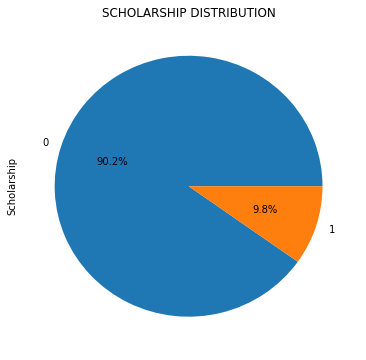

In [30]:
value=percent('Scholarship')
df['Scholarship'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(6,6)) #%1.1f%% returns a percentage with one decimal point.
plt.title('SCHOLARSHIP DISTRIBUTION')

1 represents patients sponsored by the Bolsa Familia program, 9.8% of the patients had a scholarship whilst the majority 90.2 did not have the scholarship.

## Number of patients that did not show up for the appointment

We divide the dataset into two dataframes one with all Yes in the No_show column and another with No in the No_show.

In [31]:
df_Yes=df[df['No_show']=='Yes']

To make the Yes dataframe where the patients did not show up.

In [32]:
df_Yes.shape

(22319, 12)

22319 patients did not show up for the appointment.

In [33]:
df_Yes['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

This describes the age column in the patients that did not show up for example the youngest patient who did not show up was 0 years and the oldest being 115 years.

Text(0,0.5,'NO. OF PATIENTS')

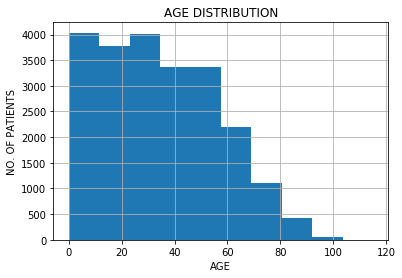

In [34]:
df_Yes['Age'].hist();
plt.title('AGE DISTRIBUTION')
plt.xlabel('AGE')
plt.ylabel('NO. OF PATIENTS')

The bar chart shows that patients aged 0 to 10 years did not were unlikely to show up.

## Number of patients that showed up for the appointment

In [35]:
df_No=df[df['No_show']=='No']

To make the Yes dataframe where the patients did show up.

In [36]:
df_No.shape

(88208, 12)

88208 patients showed up for the appointment.

In [37]:
df_No['Age'].describe()

count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

This describes the age column in the patients that showed up for example the oldest patient that showed up was 115 years old.

Text(0,0.5,'NO. OF PATIENTS')

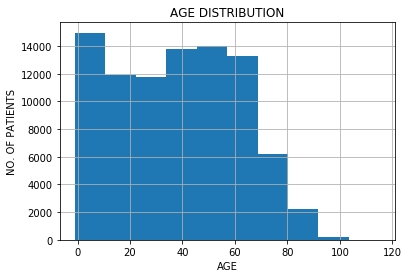

In [38]:
df_No['Age'].hist()
plt.title('AGE DISTRIBUTION')
plt.xlabel('AGE')
plt.ylabel('NO. OF PATIENTS')

Patients aged below 10 years showed up most to the appointment.

## Does age predict if the patient will show up or not?

To answer this question we group data by no show and find the average age of the patients who showed up and the ones who did not show up.

In [39]:
df.groupby(['No_show'],as_index=False)['Age'].mean()

,No_show,Age
0,No,37.790064
1,Yes,34.317667


The patients that showed up have a higher age average than the patients that did not show up that means that age can be used to predict if the patient will show up or not.

Text(0,0.5,'AVERAGE AGE')

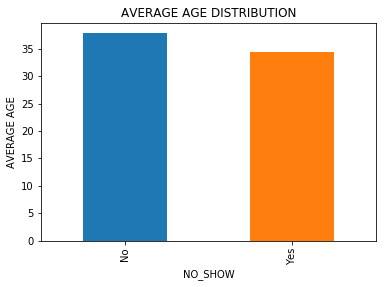

In [40]:
df.groupby('No_show').Age.mean().plot(kind='bar')
plt.title('AVERAGE AGE DISTRIBUTION')
plt.xlabel('NO_SHOW')
plt.ylabel('AVERAGE AGE')

The bar chart proves patients that showed up have a slightly higher age average than the patients that showed up.

<a id='conclusions'></a>
## Does scholarship predict whether the patient will show up

In [41]:
df.groupby(['No_show'],as_index=False)['Scholarship'].mean()

,No_show,Scholarship
0,No,0.093903
1,Yes,0.115507


Text(0,0.5,'AVERAGE SCHOLARSHIP')

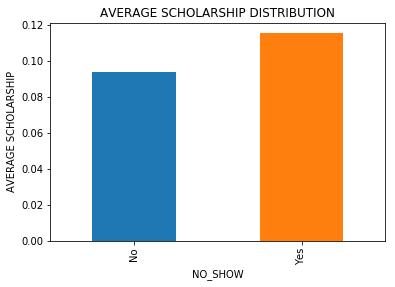

In [42]:
df.groupby('No_show').Scholarship.mean().plot(kind='bar')
plt.title('AVERAGE SCHOLARSHIP DISTRIBUTION')
plt.xlabel('NO_SHOW')
plt.ylabel('AVERAGE SCHOLARSHIP')

The patients that did not show up have a higher scholarship average than the patients that showed up meaning many patients who did not show up had a scholarship. Patients with scholarship are less expected to show for the appointments compared to the ones that do not have a scholarship.

## Does Hipertension predict whether the patient will show up?

In [43]:
df.groupby(['No_show'],as_index=False)['Hipertension'].mean()

,No_show,Hipertension
0,No,0.204392
1,Yes,0.169004


Patients with hipertension have a higher average which means patients with hipertension are more likely to show up.

Text(0,0.5,'AVERAGE HIPERTENSION')

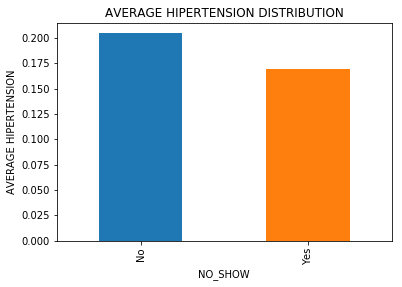

In [44]:
df.groupby('No_show').Hipertension.mean().plot(kind='bar')
plt.title('AVERAGE HIPERTENSION DISTRIBUTION')
plt.xlabel('NO_SHOW')
plt.ylabel('AVERAGE HIPERTENSION')

The patients that showed up have a higher hipertension average than the patients that never showed up meaning many people who showed up have hipertension.

## Does Diabetes predict whether the patient will show up?

In [45]:
df.groupby(['No_show'],as_index=False)['Diabetes'].mean()

,No_show,Diabetes
0,No,0.073837
1,Yes,0.064071


The Diabetes average of the patients who showed up and the ones that did not show up is has a little difference meaning they is slight difference in the diabetic patients who showed up and the ones that did not.

Text(0,0.5,'AVERAGE DIABETES')

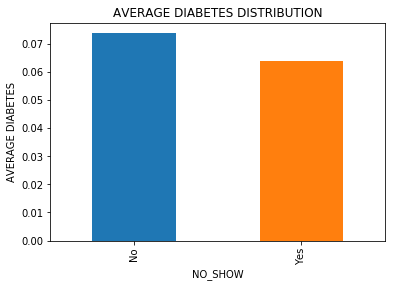

In [46]:
df.groupby('No_show').Diabetes.mean().plot(kind='bar')
plt.title('AVERAGE DIABETES DISTRIBUTION')
plt.xlabel('NO_SHOW')
plt.ylabel('AVERAGE DIABETES')

The slight difference means patients with diabetes are slightly likely to show up for the appointment than the ones who does not have diabeets.

## Does Alcoholism predict whether the patient will show up?

In [47]:
df.groupby(['No_show'],as_index=False)['Alcoholism'].mean()

,No_show,Alcoholism
0,No,0.030417
1,Yes,0.030333


The Alcoholism average of the patients who showed up and the ones that did not show up is has a little difference meaning they is slight difference in the alcoholism patients who showed up and the ones that did not.

Text(0,0.5,'AVERAGE ALCOHOLISM')

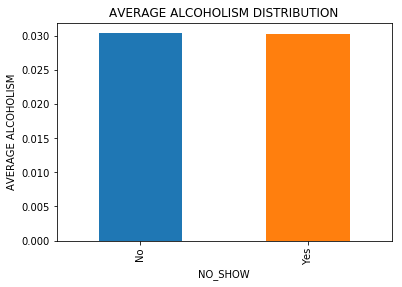

In [48]:
df.groupby('No_show').Alcoholism.mean().plot(kind='bar')
plt.title('AVERAGE ALCOHOLISM DISTRIBUTION')
plt.xlabel('NO_SHOW')
plt.ylabel('AVERAGE ALCOHOLISM')

With the visualization the slight difference means patients with alcoholism are slightly likely to show up for the appointment.

## Does being Handcapped predict whether the patient will show up?

In [49]:
df.groupby(['No_show'],as_index=False)['Handcap'].mean()

,No_show,Handcap
0,No,0.022742
1,Yes,0.020297


Text(0,0.5,'AVERAGE HANDCAP')

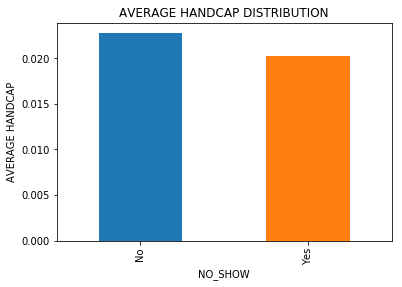

In [50]:
df.groupby('No_show').Handcap.mean().plot(kind='bar')
plt.title('AVERAGE HANDCAP DISTRIBUTION')
plt.xlabel('NO_SHOW')
plt.ylabel('AVERAGE HANDCAP')

There is little difference between the average handcap of the patients that showed up and the ones that did not.With the visualization the slight difference means patients who are handcapped are slightly likely to show up for the appointment.

## Does SMS_received predict whether the patient will show up?

In [51]:
df.groupby(['No_show'],as_index=False)['SMS_received'].mean()

,No_show,SMS_received
0,No,0.291334
1,Yes,0.438371


Text(0,0.5,'AVERAGE SMS_RECEIVED')

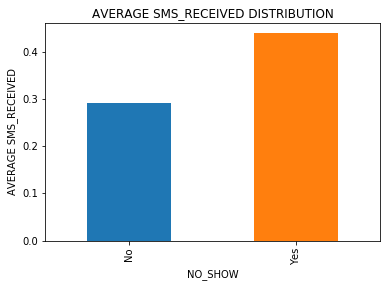

In [52]:
df.groupby('No_show').SMS_received.mean().plot(kind='bar')
plt.title('AVERAGE SMS_RECEIVED DISTRIBUTION')
plt.xlabel('NO_SHOW')
plt.ylabel('AVERAGE SMS_RECEIVED')

The patients that did not show up have a higher SMS_received average than the patients that showed up meaning many people who did not show up were sent messages. SMS_received can not be used to predict if the patients will show up because we do not why most patients who received the SMS never showed up.

## Does Gender predict if a patient will show up for the scheduled appointment

Change the No_show columns values to integers for better analysis.

In [53]:
df['No_show']=np.where(df['No_show']=='No',1,0)

1 represents No where the patient showed up for the appointment and 0 means Yes where the patient did not show up.

In [54]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


df.head() proved that changing the values was successful.

In [55]:
df.groupby(['Gender'],as_index=False)['No_show'].mean()

,Gender,No_show
0,F,0.796854
1,M,0.800321


The No_show average in males is 0.003467 higher than the average in females meaning the number female patients that showed up is slightly lower than the number of males that showed up. Age can not used to predict if a patient will show up for the appoint or not.

Text(0,0.5,'AVERAGE NO_SHOW')

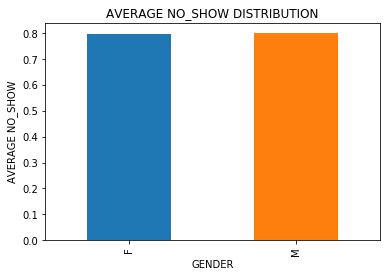

In [56]:
df.groupby('Gender').No_show.mean().plot(kind='bar')
plt.title('AVERAGE NO_SHOW DISTRIBUTION')
plt.xlabel('GENDER')
plt.ylabel('AVERAGE NO_SHOW')

The number female patients that showed up is slightly lower than the number of males that showed up. Age can not used to predict if a patient will show up for the appoint or not.

## Does age group predict if a patient will show up or not?

Data will be divided into age groups to help with analysis.

In [57]:
#bin edges that will cut data into groups
bin_edges=[0,25,50,75,100,125]

values that will be used as edges of age groups

In [58]:
#labels for the data groups
bin_names=['young','youth','middle_aged','old','very_old']

The labels the age groups will be named.

In [59]:
#create the age group column
df['age_group']=pd.cut(df['Age'],bin_edges,labels=bin_names)
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,age_group
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,middle_aged
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,middle_aged
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,middle_aged


Age group column is created and df.head(3) is used to return the first three rows to check if the column was created successfully.

In [60]:
df.groupby('age_group').mean().No_show

age_group
young          0.766714
youth          0.787037
middle_aged    0.838267
old            0.838997
very_old       0.571429
Name: No_show, dtype: float64

The No_show average for old people is the highest followed by the middle_aged patients meaning old and middle_aged patients are the most likely to show up for the appointment whilst very_old patients are less likely to show up for the appointment.

Text(0,0.5,'AVERAGE NO_SHOW')

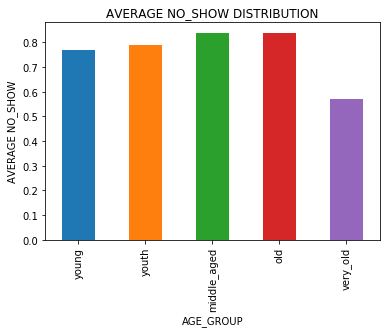

In [61]:
df.groupby('age_group').No_show.mean().plot(kind='bar')
plt.title('AVERAGE NO_SHOW DISTRIBUTION')
plt.xlabel('AGE_GROUP')
plt.ylabel('AVERAGE NO_SHOW')

The bar chart visualiaes the data above.

## Does Neighbourhood predict if a patient will show up for the scheduled appointment?

Group data by neighbourhood and find their No_show average.

In [62]:
df_neighbourhood=df.groupby(['Neighbourhood'],as_index=False)['No_show'].mean()
df_neighbourhood.head()

,Neighbourhood,No_show
0,AEROPORTO,0.875000
1,ANDORINHAS,0.769673
2,ANTÔNIO HONÓRIO,0.815498
3,ARIOVALDO FAVALESSA,0.780142
4,BARRO VERMELHO,0.784870


In [63]:
df_neighbourhood['No_show'].max()

1.0

Neighbourhood with the highest average.

In [64]:
df_neighbourhood['No_show'].min()

0.0

Neighbourhood with the lowest average.

Text(0,0.5,'AVERAGE NO_SHOW')

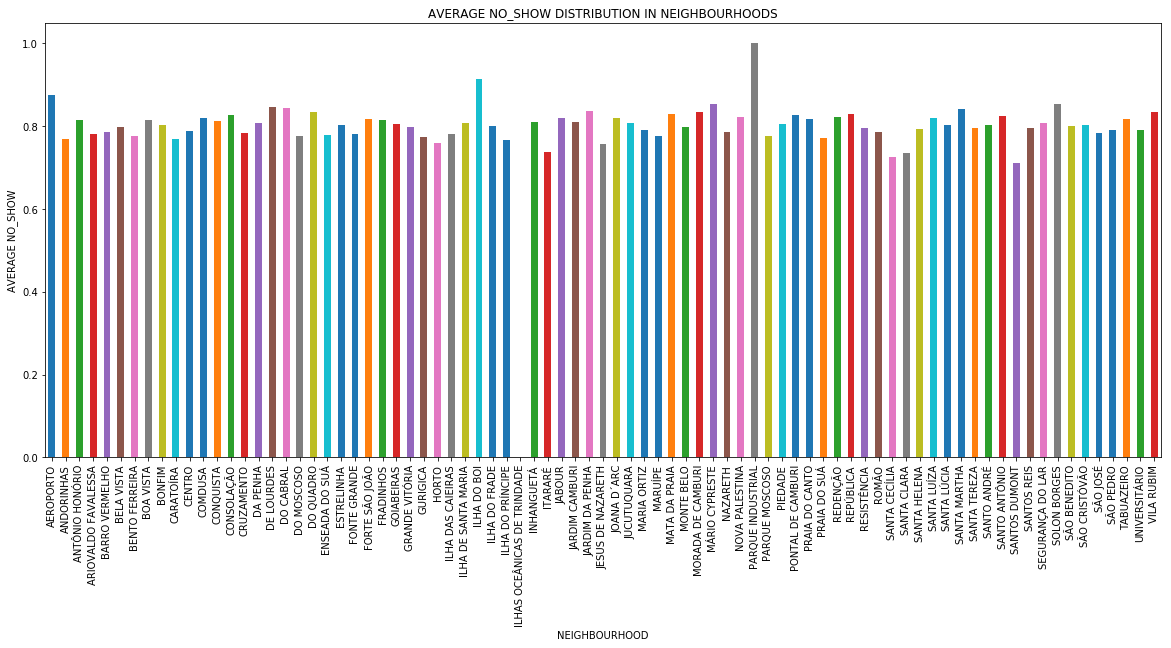

In [65]:
df_neighbourhood.groupby('Neighbourhood').No_show.mean().plot(kind='bar',figsize=(20,8))
plt.title('AVERAGE NO_SHOW DISTRIBUTION IN NEIGHBOURHOODS')
plt.xlabel('NEIGHBOURHOOD')
plt.ylabel('AVERAGE NO_SHOW')

This presents the average patients who showed up for the appointment in each neighbourhood. Patients from PARQUE INDUSTRIAL neighbourhood are all likely to show up for the appointment but no patient from ILHAS OCEÂNICAS DE TRINDADE neighbourhood is likely to attend the appointment.

In [66]:
#number of neighbourhoods
df_neighbourhood.count()

Neighbourhood    81
No_show          81
dtype: int64

There are 81 neighbourhoods in the dataset.

In [67]:
df_neigh=df_neighbourhood.sort_values('No_show', ascending=False)
df_neigh.head(3)

,Neighbourhood,No_show
51,PARQUE INDUSTRIAL,1.000000
31,ILHA DO BOI,0.914286
0,AEROPORTO,0.875000


The top 3 most likely neighbourhoods to show up for the appointment.

In [68]:
df_neigh.tail(3)

,Neighbourhood,No_show
61,SANTA CECÍLIA,0.725446
70,SANTOS DUMONT,0.710815
34,ILHAS OCEÂNICAS DE TRINDADE,0.000000


The 3 less likely neighbourhoods to show up for the appointment.

No patient from ILHASI OCEANICAS DE TRINDADE showed for the appointment while all patients from PARQUE INDUSTRIAL showed up for the appointment, this means neighbourhood is an important factor to predict if a patient shows up for the appointment. 

## Does gender determines if one has Hipertension?

In [69]:
#Does gender determines if one has Hipertension
df.groupby(['Gender'],as_index=False)['Hipertension'].mean()

,Gender,Hipertension
0,F,0.213516
1,M,0.167033


The average hipertension in females is higher which means female patients have higher chances of having hipertension compared to male patients.

## Does gender determine if one has diabetes?

In [70]:
#Does gender determine if one has diabetes
df.groupby(['Gender'],as_index=False)['Diabetes'].mean()

,Gender,Diabetes
0,F,0.078035
1,M,0.060408


The average diabetes in females is higher which means female patients have higher chances of having diabetes compared to male patients.

<a id='conclusions'></a>
## Conclusions

The most important question of th e project was what factors are important for us to know inorder to predict if the will show up for the scheduled appointment or not. The dataset had fourteen columns but 8 of them were considered. The 8 factors are to  be considered to know which ones can predict whether a patient is gonna show up for the appointment or not.
1. For scholarship factor, patients who benefit from the Brasilian welfare program Bolsa Família are not likely to show up for the appointment.
2. Patients with hipertension are more likely to show up for the appointment compared to patients with diabetes, alcoholism and the handcapped ones whose chances of showing up for the appointment are slightly lower.
3. Patients from PARQUE INDUSTRIAL neighbourhood are all likely to show up for the appointment but no patient from ILHAS OCEÂNICAS DE TRINDADE neighbourhood is likely to attend the appointment.
4. Patient's gender is not likely to affect the appointment show up.
5. Female patients are likely to have hipertension and diabetes.
6. Patients who received SMS are less likely to show up for the appointment.
## This concludes that the important factors are scholarship,hipertension and neighbourhood where diabetes, alcoholism and handcap can also be used to predict whether the patient will show up or not.



## Limitations
1. There is little information on the sickness which the patients were showing up in the appointment for.
2. Information about whether the patients skipped or cancelled the appointment is not given.
3. There is no much information about the SMS received because patients who received the SMS were unlikely to show up.

In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0